# openbabel的安装和使用(python3.6)

## OpenBabel的安装

 1. **OpenBabel**: 对化学数据进行查询, 转换, 分析和存储的开源项目;  

 2. **OpenBabel的GUI**(windows): http://openbabel.org/wiki/Category:Installation;  

 3. **OpenBabel的Python绑定**: https://pypi.org/project/openbabel/;   
    * `pip install openbabel`同时安装了openbabel和pybel两个模块;
    * 避免使用pip3单独安装`PyBEL`, 它是一个与此无关的另一个项目;
    * **openbabel**: OpenBabel 的标准绑定, 由`SWIG(C++->python)`产生;  
    * **pybel**: 比 openbabel 更轻便的模块包; 

 4. 在CMD测试GUI是否安装正确

In [1]:
%%pass 
!obabel -V #显示版本信息: Open Babel 2.4.1 -- Oct 10 2016 -- 21:27:47
!obabel -Hsdf > ./data/obabel-hsdf.txt # 将输出写入文件

5. 在Python下检查模块`pybel`是否安装正确

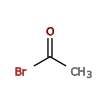

In [2]:
import pybel
mol = pybel.readstring("smi", "CC(=O)Br")
mol   # mol.draw() #使用`tkinter`显示文件

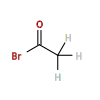

In [3]:
mol.make3D() # 从smi格式创建3D格式
mol

In [4]:
print(mol.write("sdf")) #将分子信息写入sdf字符串


 OpenBabel10231806153D

  7  6  0  0  0  0  0  0  0  0999 V2000
    1.0761   -0.0766   -0.0519 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5725   -0.0519   -0.0352 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2480    0.7916    0.5368 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.4976   -1.4012   -0.9501 Br  0  0  0  0  0  0  0  0  0  0  0  0
    0.6934    0.7713    0.5230 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7134   -1.0015    0.4035 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7134    0.0042   -1.0798 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  5  1  0  0  0  0
  1  6  1  0  0  0  0
  1  7  1  0  0  0  0
  2  3  2  0  0  0  0
  2  4  1  0  0  0  0
M  END
$$$$



In [5]:
%%pass #将分子信息写入sdf文件
mol.write(format="sdf",filename='data/CCOBr.sdf') 

6. 在Python下检查模块`openbabel`是否安装正确

In [6]:
import openbabel #不报错即使安装正确

## openbabel模块

**OpenBabel**中的对象类型:  
**OBMol**, **OBAtom**, **OBBond**, **OBResidue**(残基对象), **OBConversion**(转换对象);

使用类**OBMol**, **OBAtom**, **OBBond**一个接一个的创建原子和键

In [7]:
import openbabel

# 建立分子对象mol, 此时mol中没有原子
mol = openbabel.OBMol() 

# 在分子对象上建立原子对象a, 
a = mol.NewAtom()
a.SetAtomicNum(6) # 设置a的原子类型为C原子
a.SetVector(0.0, 1.0, 2.0) # 设置C原子的空间位置

#在mol中添加原子b
b = mol.NewAtom() 

# 在mol中添加键
mol.AddBond(1, 2, 1) #在第一个原子和第二个原子之间添加单键

# 查看分子内的原子数和成键数
%C mol.NumAtoms(); mol.NumBonds()
mol.Clear() #清除分子信息

mol.NumAtoms()  mol.NumBonds()
--------------  --------------
2               1             


True

> `mol.draw()`: pybel的Molecule对象有, 而openbabel的OBMol对象没有;

使用**OBConversion**类, 将`SMI字符串`的结构信息读入到空白分子中, 然后将分子对象`充满H原子`, 最后将分子信息写入一个`MDL字符串`;

In [8]:
import openbabel

# 创建一个OB转换对象
obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("smi", "mdl") #同时设置输入文件和输出文件的格式

# 创建一个分子对象
mol = openbabel.OBMol()

# 往分子对象中读入结构信息, 
obConversion.ReadString(mol, "C1=CC=CS1")
num1 = mol.NumAtoms()

# 往分子结构中填充H原子 
mol.AddHydrogens()   
num2 = mol.NumAtoms()

%C num1#填充H之前的原子数 ; num2#填充H之后的原子数

num1#填充H之前的原子数  num2#填充H之后的原子数
--------------  --------------
5               9             


In [9]:
# 将分子写入一个MDL字符串 
outMDL = obConversion.WriteString(mol)
print(outMDL[2:200])

OpenBabel10231806162D

  9  9  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  


文件格式转换: 从文件1读入分子信息, 然后写入文件2;

In [10]:
import openbabel

obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("pdb", "mol2")

mol = openbabel.OBMol()
obConversion.ReadFile(mol, "data/serotonin.pdb")   # 文件扩展名可以是`.mol.gz`,自动解压
mol.AddHydrogens()

%C mol.NumAtoms(); mol.NumBonds(); mol.NumResidues()

obConversion.WriteFile(mol, 'data/serotonin.mol2')
obConversion.CloseOutFile()
mol.Clear()

mol.NumAtoms()  mol.NumBonds()  mol.NumResidues()
--------------  --------------  -----------------
25              26              1                


True

迭代器类, **类名含有Iter的类**

**OBAtomAtomIter, OBAtomBondIter**: 给定`原子对象`, 迭代其`近邻原子和近邻键`;  
**OBMolAtomIter, OBMolBondIter, OBMolAngleIter, OBMolTorsionIter, OBMolRingIter**: 给定`分子对象`, 迭代所有的`原子,键,键角,扭转角和环`;    

**OBMolAtomBFSIter**: 给定`分子对象和原子索引`, 以`广度优先的方式`(breadth-first)遍历所有的近邻原子, 返回`原子对象和原子对象的深度`(由breadth-first定义);   

**OBMolPairIter**: 给定`分子对象`, 迭代所有的`原子对`(由三个键分隔的);  

**OBResidueIter**: 给定`蛋白质对象`(分子对象), 迭代所有的`残基对象`(蛋白质脱水后剩余的结构);   
**OBResidueAtomIter**: 给定`残基对象`, 迭代所有的`原子对象`; 

In [11]:
%%pass # 迭代类的使用方式
for obatom in openbabel.OBMolAtomIter(obmol):
    print(obatom.GetAtomicMass())

Note that OBMolTorsionIter returns atom IDs which are off by one. That is, you need to add one to each ID to get the correct ID. Also, if you add or remove atoms, you will need to delete the existing TorsionData before using OBMolTorsionIter.

In [12]:
%%pass  #delete the existing TorsionData before using OBMolTorsionIter. 
mol.DeleteData(openbabel.TorsionData)

> 单键旋转时, 相邻碳上的其他键会交叉成一定的角度, 称为**扭转角**;   
扭转角是0°的构象为`重叠构象`, 扭转角是180°的构象为`反错构象`, 扭转角是60°的构象是`邻位交叉构象`;

使用**double_array()**函数创建一个`double数组`

In [13]:
%%pass 
bMol.Rotate([1.0, -54.7, 3]) #Error
# 旋转矩阵的元素类型必须是C double;
myarray = openbabel.double_array([1.0, -54.7, 3])
obMol.Rotate(myarray)

访问**OBGenericData**的子类: **OBPairData**, **OBUnitCell** 

In [14]:
%%pass toPairData( obgMol.GetData() )

pairdata = [openbabel.toPairData(x) for x in obMol.GetData()
if x.GetDataType()==openbabel.PairData]
print( pairdata[0].GetAttribute(), pairdata[0].GetValue())

unitcell = openbabel.toUnitCell(obMol.GetData(openbabel.UnitCell))
print( unitcell.GetAlpha(), unitcell.GetSpaceGroup())

FastSearch(): 指纹快速搜索;  
**OpenInAndOutFiles()**: 同时打开输入文件和输出文件;

In [15]:
# 待搜索文件
br.showfile('data/150mols.smi',nhead=2)

@data/150mols.smi>>                               
  1: CC1=CC(=O)C=CC1=O	1
  2: S(SC1=NC2=CC=CC=C2S1)C3=NC4=C(S3)C=CC=C4	2


In [16]:
# 将分子骨架文件转换成快速搜索文件: smi->fs
import openbabel
conv = openbabel.OBConversion()
conv.OpenInAndOutFiles("data/150mols.smi","data/index.fs") #输入文件存在的话返回True, 并自动创建输出文件;
conv.SetInAndOutFormats("smi","fs") #同时设置输入文件和输出文件的格式
conv.Convert() #将输入文件转化为输出文件
conv.CloseOutFile() #使用转换器关闭文件

In [17]:
# 在快搜文件下进行指纹检索, 然后将结果保存成骨架文件: fs->smi
conv.OpenInAndOutFiles("data/index.fs","data/results.smi")
conv.SetInAndOutFormats("fs","smi")
conv.AddOption("s",conv.GENOPTIONS,"C#N")
conv.Convert()
conv.CloseOutFile()

In [18]:
# 查看搜索到的分子
br.showfile('data/results.smi', nhead=2)

@data/results.smi>>                               
  1: ON=C(Cc1ccccc1)C(C#N)c1ccccc1	38
  2: N#CC(C(c1ccccc1)c1ccccc1)c1ccccc1	52


> 如果是空白文件,表示没有搜索到与那种指纹相匹配的分子;

如果使用numpy向openbabel传递值, numpy数组的元素类型必须是双精度浮点数

In [19]:
mol = openbabel.OBMol()
atom = mol.NewAtom()

In [20]:
# 不能是单精度浮点数
coord = np.array([1.2, 2.3, 4.6], "float32")
try:
    atom.SetVector(coord[0], coord[1], coord[2])
except TypeError as e:
    print("Error: ",e)

Error:  in method 'OBAtom_SetVector', argument 2 of type 'double'


In [21]:
# 必须是双精度浮点数
coord = np.array([1.2, 2.3, 4.6], "float64")
# atom.SetVector(float(coord[0]), float(coord[1]), float(coord[2]))
atom.SetVector(coord[0], coord[1], coord[2])

## pybel模块

In [22]:
from pybel import *

1. **pybel**与**openbabel**相比, 具有更简单的类接口和函数, 可以更加方便执行`文件格式转换`或`属性访问`;  


2. 创建分子对象的方式:  
    * 从输入文件;
    * 从输入字符串;
    * 从OBMol类创建;

3. 创建原子对象的方式:  
    * 使用OBAtom类创建原子对象; 
    * 通过访问分子对象的原子属性; 

**将`150mols.smi`转化成`150mols.sdf`文件备用**

In [23]:
import openbabel
conv = openbabel.OBConversion()
conv.OpenInAndOutFiles("data/150mols.smi","data/150mols.sdf") 
conv.SetInAndOutFormats("smi","sdf") 
conv.Convert() 
conv.CloseOutFile() 

In [24]:
br.showfile('data/150mols.sdf', ntail=2)

@data/150mols.sdf>>                               
5863: M  END
5864: $$$$


### 分子方法:   

|方法|描述|
|:---|:---|
|write()| 将分子信息写入文件;||calcfp()| 计算分子指纹(fingerprint);|
|draw()| 绘制分子骨架;||addh()| 添加H;|
|removeh()| 删除H;||make3D()| 创建3D骨架;|
|localopt()| 局域结构优化;||calcdesc()| 计算分子描述符;|  

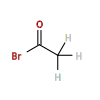

In [25]:
mol = readfile('sdf', 'data/CCOBr.sdf').__next__()
mol

将分子骨架保存为图片

In [26]:
%%pass
mol.draw(show=False, filename='data/CCOBr.png')

将150mols.sdf文件中的所有分子保存为图像

In [27]:
%%pass
from pybel import *
mols = readfile("sdf", "data/150mols.sdf") #mols是一个迭代对象
for i, mol in enumerate(mols):
    mol.draw(show=False,filename='data/150mols/{}.png'.format(i+1))

In [28]:
# 计算分子描述符;
descvalues = mol.calcdesc()
# Polar SurfaceArea (“TPSA”) and Molar Refractivity (“MR”)
%C descvalues['logP']; descvalues['TPSA']; descvalues['MR']

descvalues['logP']  descvalues['TPSA']  descvalues['MR']
------------------  ------------------  ----------------
0.9278              17.07               19.798          


In [29]:
# 添加分子数据
mol.data.update(descvalues)
output = Outputfile("sdf", "data/CCOBr-desc.sdf", overwrite=True)
output.write(mol)
output.close()

### 分子属性:  

|属性|描述|
|:---|:---|
|atoms| 列表, 分子中的原子对象;|charge| 分子电荷;|
|data| 字典(分子数据对象), 分子数据;|dim| 分子维数;|
|energy| 分子能量;|exactmass| 分子的精确质量;|
|formula| 分子化学式;|molwt| 分子重量;|
|spin| 自旋数;|sssr| The Smallest Set of Smallest Rings;|
|title| 分子标题;|unitcell| 如果分子被保存在晶胞中, 返回分子所在晶胞的信息;|
|conformers|分子构象;|

In [30]:
mols = readfile("sdf", "data/150mols.sdf") #mols是一个迭代对象
%col [mol.formula for mol in mols][:11]

C7H6O2     |C14H8N2S4  |C6H3ClN2O5 |C3H3N3O2S  |C14H9NO2   |C20H10Br2O5|
C12H10ClNO2|C15H9NO4   |C4H8N2O2   |C18H15P    |C14H22O2   |


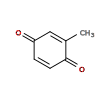

In [31]:
mols = readfile("sdf", "data/150mols.sdf") #mols是一个迭代对象
mol = mols.__next__() #迭代对象的第一个元素
mol

In [32]:
# 查看分子属性
%C mol.formula; mol.dim; mol.title; mol.spin 

mol.formula  mol.dim  mol.title  mol.spin
-----------  -------  ---------  --------
'C7H6O2'     2        '1'        1       


In [33]:
# 分子中的第一个原子对象
atom = mol.atoms[0]
type(atom)

pybel.Atom

### 原子属性:  

|属性|描述|-|-|
|:---|:---|:|:|
|atomicmass|原子质量|atomicnum|原子序数|
|coords(x,y,z)|原子坐标|exactmass|原子的精准质量|
|formalcharge|形式电荷|heavyvalence|附着的非H原子数|
|heterovalence|附着的异质原子数|hyb|原子杂化,3:sp3|
|idx|原子在分子中的编号, 从1开始计数|implicitvalence|价电子数|
|isotope|同位素,需提前指定|partialcharge|局部电荷|
|spin|自旋多重性|type|原子类型|
|valence|明确的价电子连接数|vector|矢量|

In [34]:
%C 5 atom.atomicnum; atom.idx; atom.partialcharge; atom.hyb; atom.type
%C 5 atom.implicitvalence ; atom.valence; atom.heavyvalence; atom.heterovalence

atom.atomicnum     atom.idx      atom.partialcharge     atom.hyb     atom.type
--------------     --------     -------------------     --------     ---------
6                  1            0.03448524080468646     3            'C3'     
atom.implicitvalence     atom.valence     atom.heavyvalence     atom.heterovalence
--------------------     ------------     -----------------     ------------------
4                        1                1                     0                 


### 读入分子信息

readstring(): 从字符串中读取分子信息;  
readfile(): 从文件中迭代式读取分子信息;

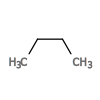

In [35]:
mymol = readstring("smi", "CCCC")
mymol

In [36]:
for mymol in readfile("sdf", "data/CCOBr.sdf"):
    print(mymol.formula)

C2H3BrO


### 写入分子信息

mymol.write(format): 返回字符串;  
mymol.write(format,filename): 保存到文件;

In [37]:
mymol.write("smi")

'CC(=O)Br\t\n'

In [38]:
mymol.write("smi", "data/CCOBr.txt", overwrite=True)
br.showfile('data/CCOBr.txt')

@data/CCOBr.txt>>                                 
  1: CC(=O)Br	


将多个分子写入同一个文件, 需要用到`Outputfile`类

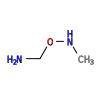

In [39]:
mymol2 = readstring("smi", "CNOCN")
mymol2

In [40]:
largeSDfile = Outputfile("sdf", "data/multipleSD.sdf",overwrite=True)
largeSDfile.write(mymol)
largeSDfile.write(mymol)
largeSDfile.close()

In [41]:
br.showfile('data/multipleSD.sdf', nspec=[2,14])

@data/multipleSD.sdf>>                            
  2:  OpenBabel10231806163D
 14:   1  6  1  0  0  0  0


### 指纹对象

**指纹对象**的创建方式:  
1. 通过分子的calcfp()方法;  
2. 通过GetFingerprint(myvector);

fptype指纹类型: 默认为FP2;  
指纹对象的属性:  
fp: 与指纹相对应的OB矢量;  
bits: 峰位?;

In [42]:
smiles = ['CCCC', 'CCCN']
mols = [readstring("smi", x) for x in smiles] #包含两个分子的列表
fps = [x.calcfp() for x in mols] # 计算分子列表中每个分子的指纹

In [43]:
%C 5 fps[0].bits; fps[1].bits; fps[0] | fps[1] # Tanimoto系数

  fps[0].bits             fps[1].bits            fps[0] | fps[1] # Tanimoto系数
---------------     ------------------------     ----------------------------
[261, 385, 671]     [83, 261, 349, 671, 907]     0.3333333333333333          


### Smarts对象

智能模式匹配(SMARTS matching)

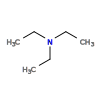

In [44]:
mol = readstring("smi","CCN(CC)CC") # triethylamine
mol

In [45]:
smarts = Smarts("[#6][#6]") # Matches an ethyl group
smarts.findall(mol)

[(1, 2), (4, 5), (6, 7)]

### 与openbabel模块结合

使用pybel模块读取PDB文件, 使用openbabel模块添加H原子

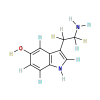

In [46]:
mol = readfile("pdb", "data/serotonin.pdb").__next__()
mol

In [47]:
# 查看Mol对象的父类
# help(mol)

In [48]:
%C len(mol.atoms); mol.molwt

len(mol.atoms)      mol.molwt     
--------------  ------------------
25              176.21507999999986


In [49]:
# 显示openbabel模块提供的方法列表
%omit 5 dir(mol.OBMol)

['AddAtom',
 'AddBond',
 'AddConformer',
 'AddHydrogens',
 'AddNewHydrogens',
...


In [50]:
# pybel的Mol对象**通过OBMol**直接调用openbabel的方法
mol.OBMol.AddHydrogens()
len(mol.atoms), mol.molwt

(25, 176.21507999999986)

使用openpybel创建分子, 使用pybel保存分子

In [51]:
import openbabel, pybel

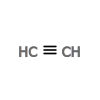

In [52]:
# 使用openbabel创建分子对象
mol = openbabel.OBMol()
a = mol.NewAtom()
a.SetAtomicNum(6) # carbon atom
a.SetVector(0.0, 1.0, 2.0) # coordinates
b = mol.NewAtom()
b.SetAtomicNum(6)
mol.AddBond(1, 2, 3) # atoms indexed from 1

# 使用pybel模块保存分子对象
pybelmol = pybel.Molecule(mol)
pybelmol

In [53]:
pybelmol.write("sdf", "data/C2H2.sdf", overwrite=True)

## Pybel API

pybel API: http://openbabel.org/docs/current/UseTheLibrary/Python_PybelAPI.html;

### pybel的全局变量

In [54]:
global_variables = ['informats', 'outformats', 'descs', 'fps', 'forcefields', 'operations']

pybel支持的所有输入文件

In [55]:
%omit 5 pybel.informats

{'abinit': 'ABINIT Output Format',
 'acesout': 'ACES output format',
 'acr': 'ACR format',
 'adfout': 'ADF output format',
 'alc': 'Alchemy format',
...


pybel支持的所有输出文件

In [56]:
%omit 5 pybel.outformats

{'acesin': 'ACES input format',
 'adf': 'ADF cartesian input format',
 'alc': 'Alchemy format',
 'ascii': 'ASCII format',
 'bgf': 'MSI BGF format',
...


pybel支持的所有描述符

In [57]:
%col 11 pybel.descs 

abonds  |atoms   |bonds   |cansmi  |cansmiNS|dbonds  |formula |HBA1    |HBA2    |HBD     |InChI   |
InChIKey|L5      |logP    |MP      |MR      |MW      |nF      |s       |sbonds  |smarts  |tbonds  |
title   |TPSA    |


pybel支持的所有操作

In [58]:
%col 8 pybel.operations

0xout        |addfilename  |AddInIndex   |AddNonPolarH |AddPolarH    |align        |canonical    |ChangeCell   |
confab       |conformer    |DelNonPolarH |DelPolarH    |energy       |fillUC       |gen2D        |gen3D        |
genalias     |highlight    |largest      |minimize     |partialcharge|readconformer|s            |smallest     |
sort         |split        |unique       |v            |


pybel支持的所有指纹类型

In [59]:
%col 11 pybel.fps 

ecfp0 |ecfp10|ecfp2 |ecfp4 |ecfp6 |ecfp8 |fp2   |fp3   |fp4   |maccs |


pybel支持的所有力场

In [60]:
pybel.forcefields 

['gaff', 'ghemical', 'mmff94', 'mmff94s', 'uff']

### pybel函数和类

**pybel函数**: readfile(), readstring();  
**pybel类**: Atom, Molecule, Outputfile, Fingerprint, Smarts, MoleculeData;  
**openbabel**模块的原子对象和分子对象由OBAtom和OBMol定义;

## 其他网络资源

http://openbabel.org/docs/current/UseTheLibrary/PythonExamples.html